# TMDB movies

Load all the necessary packages

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md


Load the dataset into a DataFrame and inspect the first rows of the DataFrame.

In [126]:
filepath = "TMDB-movies-small.csv"
csv_data = pd.read_csv(filepath)
csv_data.head()

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,11,16,Dancer in the Dark,7.868,1697,Released,2000-09-01,40061153.0,140,12500000.0,...,"Drama, Crime","Lantia Cinema & Audiovisivi, Fine Line Feature...","Argentina, Denmark, Finland, France, Germany, ...",English,"Bobo Eriksson, Caroline Sascha Cogez, Bo Weste...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk
1,26,55,Amores Perros,7.600,2475,Released,2000-06-16,20908467.0,154,2000000.0,...,"Drama, Thriller","Altavista Films, Zeta Film",Mexico,Español,"Gerardo Campbell, Rosa María Bianchi, Ricardo ...",Alejandro González Iñárritu,Rodrigo Prieto,Guillermo Arriaga,"Martha Sosa Elizondo, Francisco González Compe...",Gustavo Santaolalla
2,31,64,Talk to Her,7.579,1233,Released,2002-03-15,64803131.0,112,0.0,...,"Drama, Romance","Vía Digital, Good Machine, El Deseo, Atresmedia",Spain,Español,"Carlos García Cambero, Leonor Watling, Pina Ba...",Pedro Almodóvar,Javier Aguirresarobe,Pedro Almodóvar,"Michel Ruben, Agustín Almodóvar","Alberto Iglesias, Vicente Amigo"
3,32,65,8 Mile,7.134,6958,Released,2002-11-08,242875078.0,111,41000000.0,...,"Drama, Music","Mikona Productions, Imagine Entertainment","Germany, United States of America",English,"Malik Barnhardt, Mike Bell, Allen Adams, Abdul...",Curtis Hanson,Rodrigo Prieto,Scott Silver,"Jimmy Iovine, Jim Whitaker, Brian Grazer, Greg...",NaN
4,38,71,Billy Elliot,7.600,3691,Released,2000-09-28,109280263.0,110,5000000.0,...,"Drama, Comedy, Music","StudioCanal, BBC Film, Tiger Aspect, Arts Coun...","France, United Kingdom, United States of America",English,"Lee Williams, Colin MacLachlan, Neil North, Pa...",Stephen Daldry,Brian Tufano,Lee Hall,"Jonathan Finn, Natascha Wharton, Tessa Ross, D...",Stephen Warbeck


Create a new DataFrame with all the movies released in 2000. Tip: Format the release dates as pandas datetime objects. Inspect the amount of rows in the new DataFrame.

In [127]:
df = pd.DataFrame(csv_data)
# df[df['release_date'].str.fullmatch(r'^2000.*$')]
df['release_date'] = pd.to_datetime(df['release_date'])
df_from_2000 = df[df['release_date'].dt.year == 2000]

Create a new DataFrame df_topmovies which only incorporates the rows with the movies of the year 2000 who get an average score of at least 9. Compare the total rows of the original dataframe with df_topmovies. (Tip: use shape)

In [128]:
df_topmovies = df_from_2000[df_from_2000['vote_average'] >= 9]
print(f"Original df: {df.shape}\nTop movies df: {df_topmovies.shape}")

Original df: (9392, 26)
Top movies df: (185, 26)


Replace all NaN's with 0.

In [129]:
# df = df.replace(np.nan, 0)
df_topmovies = df.fillna(0)
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               9392 non-null   int64         
 1   id                       9392 non-null   int64         
 2   title                    9392 non-null   object        
 3   vote_average             9392 non-null   float64       
 4   vote_count               9392 non-null   int64         
 5   status                   9392 non-null   object        
 6   release_date             9392 non-null   datetime64[ns]
 7   revenue                  9392 non-null   float64       
 8   runtime                  9392 non-null   int64         
 9   budget                   9392 non-null   float64       
 10  imdb_id                  9392 non-null   object        
 11  original_language        9392 non-null   object        
 12  original_title           9392 non-

Plot the data using a graph with on the x-axis the release dates and on the y-axis the runtime of the film.
* Use appropriate labels and titles
* Change the ticks and tick labels so every month has a tick and as label the abbreviation of the month (Jan, Feb, March etc.)
* Change the color of the graph
* Show a grid
* Show the legend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


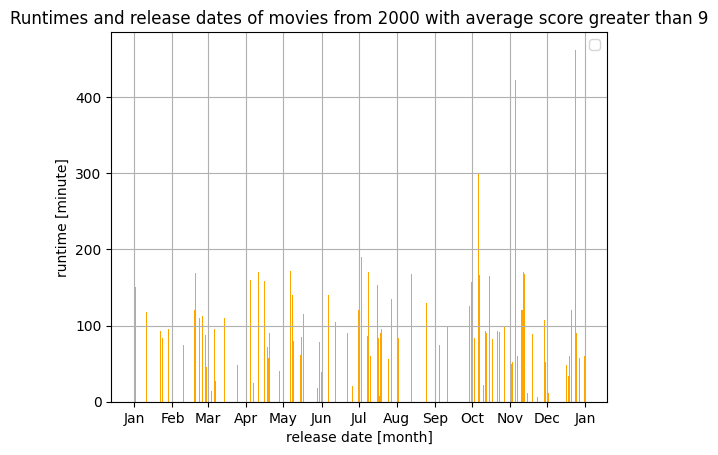

In [149]:
release_date = df_topmovies['release_date']
runtime = df_topmovies['runtime']
# data_histo = pd.DataFram({
#     'release_date': release_date,
#     'runtime': runtime
# })
plt.xlabel('release date [month]')
plt.ylabel('runtime [minute]')

# https://stackoverflow.com/questions/46555819/months-as-axis-ticks
# Set the locator.
locator = md.MonthLocator() # every month
# Specify the format - %b gives us Jan, Feb, ...
fmt = md.DateFormatter('%b')

plt.bar(release_date, runtime, color='orange')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specift formatter.
X.set_major_formatter(fmt)

plt.legend()
plt.title("Runtimes and release dates of movies from 2000 with average score greater than 9")
# release_date
plt.grid()
plt.show()


# # # SOLUTION 2
# data_histo = pd.DataFrame({
#     'purchase_lead': [86, 60, 90, 110, 120],
#     'booking_count': [2468, 900, 79, 107, 66],
# })
# plt.bar(data_histo['purchase_lead'], data_histo['booking_count'], align='center')
# plt.xlabel('purchase_lead')
# plt.ylabel('booking_count')
# plt.legend()
# plt.show()